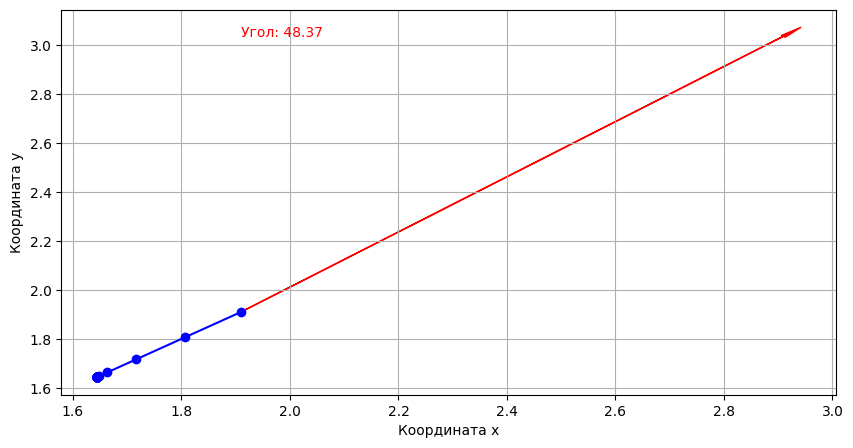

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Начальное состояние
x = np.array([0, 0, 0, 0])  # [x, y, dx, dy], начальное положение и скорость

# Описание системы
dt = 1  # интервал времени
F = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])  # матрица перехода состояния
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])  # матрица измерения
Q = np.array([[0.1, 0, 0, 0], [0, 0.1, 0, 0], [0, 0, 0.1, 0], [0, 0, 0, 0.1]])  # ковариация шума процесса
R = np.array([[0.1, 0], [0, 0.1]])  # ковариация шума измерений

# Инициализация ковариации и предсказания
P = np.eye(4)  # ковариационная матрица
pred_x = x  # начальное предсказание

def kalman_filter(x, P, pred_x, F, Q, H, R, measurement):
    # Предсказание
    pred_x = np.dot(F, pred_x)
    P = np.dot(np.dot(F, P), F.T) + Q

    # Обновление
    y = measurement - np.dot(H, pred_x)
    S = np.dot(np.dot(H, P), H.T) + R
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S))
    x = pred_x + np.dot(K, y)
    P = P - np.dot(np.dot(K, H), P)

    return x, P, pred_x

# Создание массива для сохранения координат дрона
drone_positions = []

# Пример измерения
measurement = np.array([2, 2])  # измеренное расстояние от дрона до стены

for i in range(100):
    # Прогнозирование нового состояния
    x, P, pred_x = kalman_filter(x, P, pred_x, F, Q, H, R, measurement)

    # Сохранение координат для построения трассы
    drone_positions.append((x[0], x[1]))

# Преобразование массива координат в удобный формат для построения графика
drone_positions = np.array(drone_positions)

# Построение трассы движения дрона
plt.figure(figsize=(10, 5))
plt.plot(drone_positions[:, 0], drone_positions[:, 1], marker='o', linestyle='-', color='b')
#plt.title('Трасса движения дрона')
plt.xlabel('Координата x')
plt.ylabel('Координата y')

# Отображение угла направления
plt.arrow(drone_positions[0, 0], drone_positions[0, 1], 1, np.tan(x[2]), head_width=0.01, head_length=0.05, fc='r', ec='r')
plt.text(drone_positions[0, 0], drone_positions[0, 1]+np.tan(x[2]), 'Угол: {:.2f}'.format(np.degrees(x[2])), color='r')

# Отображение графика
plt.grid(True)
plt.show()
